## Bovine TB data analysis 

This is where the data files are: https://www.gov.uk/government/statistical-data-sets/tuberculosis-tb-in-cattle-in-great-britain . I am using the one called 'TB in cattle in Great Britain - GB by country dataset (ODS).' I am using the third sheet, called 'GB_monthly' and the column called 'Total animals slaughtered.' I have put this column in a new csv file on its own. I have converted the date column to yyyy-mm in excel, and got rid of the commas in the numerical column. 

The same sheet also has the break down by year, which I have also put into a new csv on its own to analyse with pandas.

This is where the latest narrative report is: https://www.gov.uk/government/statistics/incidence-of-tuberculosis-tb-in-cattle-in-great-britain

This is where the new data will be published on 13 June 2018 at 9.30am https://www.gov.uk/government/statistics/announcements/quarterly-headline-statistics-on-tb-in-cattle-great-britain-data-to-march-2018



In this notebook I want to:

- Find out the average number of animals slaughtered per month in 1996
- Find out the average number of animals slaughtered so far per month in 2018 

Import the libraries

In [42]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Import the csv 

In [43]:
df = pd.read_csv('/Users/rosaellis/Dropbox/001_UNISON/018_data_stories/06_june/bovine_tb/02_bovinetb_analysed_data/bovine_tb_csv_for_python_year_month.csv')

In [44]:
df.head()

,year_month,total_animals_slaughtered
0,1996-01,327
1,1996-02,638
2,1996-03,382
3,1996-04,398
4,1996-05,314


In [45]:
df.tail(50)

,year_month,total_animals_slaughtered
217,2014-02,3012
218,2014-03,2917
219,2014-04,2881
220,2014-05,2756
221,2014-06,2658
222,2014-07,2328
223,2014-08,1949
224,2014-09,2560
225,2014-10,2929
226,2014-11,2736


Some empty cells from the csv seem to have been brought in so I'll drop them: 

In [46]:
df1 = df.drop(df.index[267:290])

In [47]:
df1.tail()

,year_month,total_animals_slaughtered
262,2017-11,4223
263,2017-12,3455
264,2018-01,4096
265,2018-02,3900
266,2018-03,4288


In [48]:
df1.tail()

,year_month,total_animals_slaughtered
262,2017-11,4223
263,2017-12,3455
264,2018-01,4096
265,2018-02,3900
266,2018-03,4288


In [49]:
df1 = df1.drop(df1.index[-1])

In [50]:
df1.tail()

,year_month,total_animals_slaughtered
261,2017-10,4391
262,2017-11,4223
263,2017-12,3455
264,2018-01,4096
265,2018-02,3900


In [51]:
df1 = df1.drop(df1.index[-1])

In [52]:
df1.tail()

,year_month,total_animals_slaughtered
260,2017-09,3168
261,2017-10,4391
262,2017-11,4223
263,2017-12,3455
264,2018-01,4096


In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 264
Data columns (total 2 columns):
year_month                   265 non-null object
total_animals_slaughtered    265 non-null int64
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


Next I will convert the year_month column into a period, so that pandas knows it is a time series 

In [54]:
df1.year_month = pd.to_datetime(df1.year_month)

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 264
Data columns (total 2 columns):
year_month                   265 non-null datetime64[ns]
total_animals_slaughtered    265 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB


In [56]:
df1.set_index('year_month', inplace=True)

In [57]:
df1.head()

,total_animals_slaughtered
year_month,
1996-01-01,327
1996-02-01,638
1996-03-01,382
1996-04-01,398
1996-05-01,314


In [58]:
df1.tail()

,total_animals_slaughtered
year_month,
2017-09-01,3168
2017-10-01,4391
2017-11-01,4223
2017-12-01,3455
2018-01-01,4096


Next find out some averages about each year

In [59]:
df1['1996'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 1996-01-01 to 1996-12-01
Data columns (total 1 columns):
total_animals_slaughtered    12 non-null int64
dtypes: int64(1)
memory usage: 192.0 bytes


In [60]:
year_1996 = df1['1996']

In [61]:
year_1996

,total_animals_slaughtered
year_month,
1996-01-01,327
1996-02-01,638
1996-03-01,382
1996-04-01,398
1996-05-01,314
1996-06-01,245
1996-07-01,289
1996-08-01,239
1996-09-01,213


In [62]:
year_1996.mean()

total_animals_slaughtered    336.0
dtype: float64

In [63]:
average_1996 = year_1996.mean()

The average number of cows slaughtered per month in 1996 was: 

In [64]:
average_1996

total_animals_slaughtered    336.0
dtype: float64

The average number of cows slauthered for TB in each month this year, so far, is: 

In [65]:
df1['2018'].mean()

total_animals_slaughtered    4096.0
dtype: float64

The month in which the most cows were slaughered was: 

In [66]:
df1.idxmax()

total_animals_slaughtered   2017-05-01
dtype: datetime64[ns]

The total number of cows slaughtered in 1996 was:

In [67]:
df1['1996'].sum()

total_animals_slaughtered    4032
dtype: int64

The total number of cows slaughtered in 2017 was: 

In [68]:
df1['2017'].sum()

total_animals_slaughtered    43564
dtype: int64

The percentage change from 1996 to 2017
First get 2017 as a variable 

In [69]:
year_2017_sum = df1['2017'].sum()

In [70]:
year_1996_sum = year_1996.sum()

In [71]:
percentage_change = (year_2017_sum - year_1996_sum)/year_1996_sum

In [72]:
percentage_change

total_animals_slaughtered    9.804563
dtype: float64

(I have to times the answer above by 100 which means the percentage increase is 980%!

Next I want to get a new dataframe with the year data in it, so I can do a plot with just year in it 

In [73]:
df_year = df1.resample('Y').sum()

In [74]:
df_year.head()

,total_animals_slaughtered
year_month,
1996-12-31,4032
1997-12-31,3778
1998-12-31,6157
1999-12-31,7199
2000-12-31,8536


In [75]:
df_year_no2018 = df_year.drop(df_year.index[-1])

Next I will plot df_year

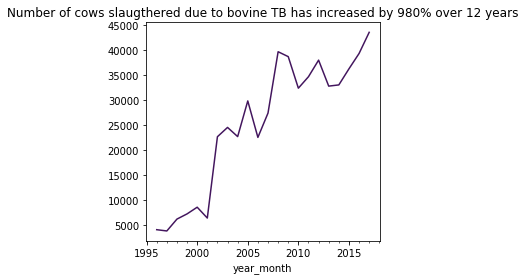

In [76]:
df_year_no2018.total_animals_slaughtered.plot(title='Number of cows slaugthered due to bovine TB has increased by 980% over 12 years', color='#43165E')
plt.tight_layout(); plt.show()

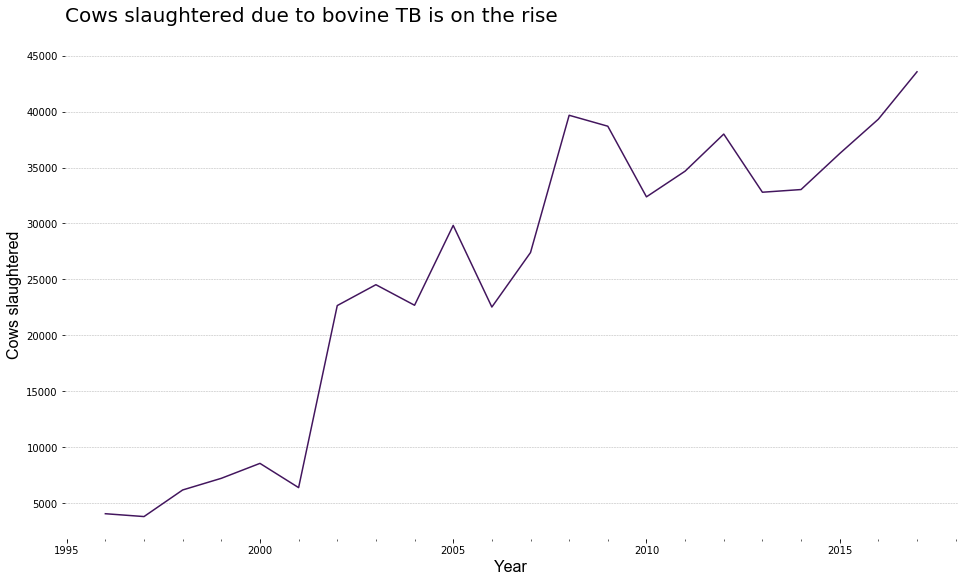

In [92]:
my_chart = df_year_no2018.total_animals_slaughtered.plot(color='#43165E', figsize=(16,9))
my_chart.set_xlabel("Year", fontname="Arial", fontsize=16)
my_chart.set_ylabel("Cows slaughtered",fontname="Arial", fontsize=16)
plt.title('Cows slaughtered due to bovine TB is on the rise\n', loc='left', fontsize=20)
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.box(on=None)
plt.show()

In [86]:
fig = my_chart.get_figure()
fig.savefig("cows_slaughtered2.png")

The average number of cows slaughtered per month so far in 2018 is:

In [79]:
df1['2018'].mean()

total_animals_slaughtered    4096.0
dtype: float64

The number of cows slaughtered in 2017 is:

In [80]:
df1['2017'].sum()

total_animals_slaughtered    43564
dtype: int64

The total slaughtered so far in 2018 is:

In [81]:
df1['2018'].sum()

total_animals_slaughtered    4096
dtype: int64